# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БСТ2004 Зенин Михаил Витальевич
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Варианты заданий:

Вариант | Задание
:-------- |:-----
1, 7, 13, 19, 25 | Алгоритм Флойда-Уоршелла
2, 8, 14, 20, 26 | Алгоритм Дейкстры
3, 9,15,21,27 | Алгоритм Беллмана-Форда
4, 10, 16, 22, 28 | Алгоритм Джонсона
5, 11, 17, 23, 29| Алгоритм Левита
6, 12, 18, 24, 30 | Алгоритм Йена



### Выполнение:

Edges: [(0, 2), (0, 4), (1, 3), (2, 1), (3, 1), (3, 0), (4, 2)]
Result sizes of ways: [0, 15, 7, 18, 6]
Weights of edges:
(0, 2) 7
(0, 4) 6
(1, 3) 3
(2, 1) 8
(3, 1) 7
(3, 0) 8
(4, 2) 5
Время работы: 0.0002357959747314453 seconds


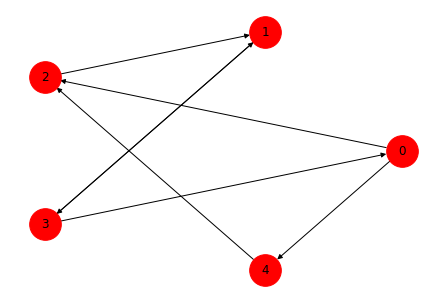

In [ ]:
from networkx.algorithms.smallworld import random_reference
import numpy as np
from networkx import DiGraph
import networkx
import random
from queue import Queue
import time

def graph_generator(num_of_nodes = 5,num_of_edge = 7):
    if num_of_edge < num_of_nodes:
        return Exception("Graph is not connected")
    else:
        nodes = []
        # генерируем названия узлов
        nodes = list(range(0,num_of_nodes))
        iter = 0
        # создаем пустой граф
        graph = DiGraph()
        graph.add_nodes_from(nodes)
        while iter < num_of_edge:
            start = random.choice(nodes)
            end = random.choice(nodes)
            if ((start,end) in graph) or (start == end):
                continue
            else:
                weight = random.choice(range(1,10))            
                graph.add_edge(start,end)
                graph[start][end]['weight'] = weight
            iter = iter + 1
        networkx.draw_circular(graph,
         node_color='red',
         node_size=1000,
         with_labels=True)
    return graph

def Levit(graph,s = 0):
    # инициализируем нужные нам множества и очереди
    M = set()
    M1_main = Queue()
    M1_urgent = Queue()
    M1 = set()
    M2 = set()
    # помещаем заданную вершину в срочную очередь
    M1_urgent.put(s)
    M1.add(s)
    # помещаем все остальные вершины в множество M2
    for node in graph.nodes:
        if node != s:
            M2.add(node)
    # создаем список кратчайших путей от заданной вершины до остальных
    d = [float('inf')] * (len(graph.nodes))
    d[s] = 0
    list_of_edges = list(graph.edges)
    #while M1_main.empty() or M1_urgent.empty():
    while len(M1) != 0:
        if not M1_urgent.empty():
            u = M1_urgent.get()
            M1.remove(u)
        else: 
            u = M1_main.get()
            M1.remove(u)
        # Получаем вершины, соединенные с текущим ребром
        le = list(filter(lambda x: x[0] == u,list_of_edges))
        if not le:
            M.add(u)
            if len(M2) != 0:
                next_node = list(M2)[0]
                M1_main.put(next_node)
                M1.add(next_node)
                M2.remove(next_node)
            else:
                break
        k = []
        for i in range(len(le)):
            k.append(le[i][1])
        for i in range(len(le)):    
            for v in k:
                if v in M2:
                    M2.remove(v)
                    M1_main.put(v)
                    M1.add(v)
                    d[v] = d[u] + graph[u][v]['weight']
                elif v in M1:
                    d[v] = min(d[v],d[u] + graph[u][v]['weight'])
                elif v in M:
                    if d[v] > d[u] + graph[u][v]['weight']:
                        d[v] = d[u] + graph[u][v]['weight']
                        M1_urgent.put(v)
                        M1.add(v)
                        M.remove(v)
        M.add(u)
    for i in range(len(d)):
        if d[i] == float('inf'):
            d[i] = 0
    return d    

if __name__ == "__main__":
    g = graph_generator()
    print('Edges:',g.edges)
    startTime = time.time()
    p = Levit(g,0)
    endTime = time.time()
    print("Result sizes of ways:",p)    
    print("Weights of edges:")
    for i in g.edges:
        print(i,g[i[0]][i[1]]['weight'])
    print("Время работы:",endTime - startTime,"seconds")

### Вывод
Мною были рассмотены основные алгоритмы поиска путей и сетевые алгоритмы